In [1]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from datasets import load_dataset
from utils import preprocess_function, filter_function
from transformers import AutoTokenizer

In [2]:
path = '../datasets/wikisql/data'
dataset = load_dataset(path)

In [3]:
tokenizer = AutoTokenizer.from_pretrained("google/t5-efficient-tiny")
tokenized_dataset = dataset.map(lambda batch: preprocess_function(batch, tokenizer, input_max_length=None, output_max_length=None, padding="do_not_pad"), batched=True, batch_size=2048, load_from_cache_file=False)

Map:   0%|          | 0/56355 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/8421 [00:00<?, ? examples/s]

Map:   0%|          | 0/15878 [00:00<?, ? examples/s]

In [4]:
tokenized_train_data = tokenized_dataset["train"]
tokenized_val_data = tokenized_dataset["validation"]
tokenized_val_data

Dataset({
    features: ['phase', 'question', 'table', 'sql', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 8421
})

In [5]:
def sequence_length_histograms(data):
    # Calculate sequence lengths for inputs and labels
    input_lengths = [len(seq) for seq in data["input_ids"]]
    label_lengths = [len(seq) for seq in data["labels"]]
    
    # Determine bins
    bins_inputs = max(input_lengths) - min(input_lengths) + 1
    bins_labels = max(label_lengths) - min(label_lengths) + 1
    
    # Create side-by-side histograms
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
    
    # Plot histogram for input lengths
    axes[0].hist(input_lengths, bins=bins_inputs, alpha=0.7, color='blue', edgecolor='black')
    axes[0].axvline(np.mean(input_lengths), color='red', linestyle='dashed', linewidth=1, label='Mean Length')
    axes[0].set_xlabel('Input Sequence Length')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Histogram of Input Sequence Lengths')
    axes[0].legend()
    
    # Plot histogram for label lengths
    axes[1].hist(label_lengths, bins=bins_labels, alpha=0.7, color='green', edgecolor='black')
    axes[1].axvline(np.mean(label_lengths), color='red', linestyle='dashed', linewidth=1, label='Mean Length')
    axes[1].set_xlabel('Label Sequence Length')
    axes[1].set_title('Histogram of Label Sequence Lengths')
    axes[1].legend()
    
    # Show the plots
    plt.tight_layout()
    plt.show()

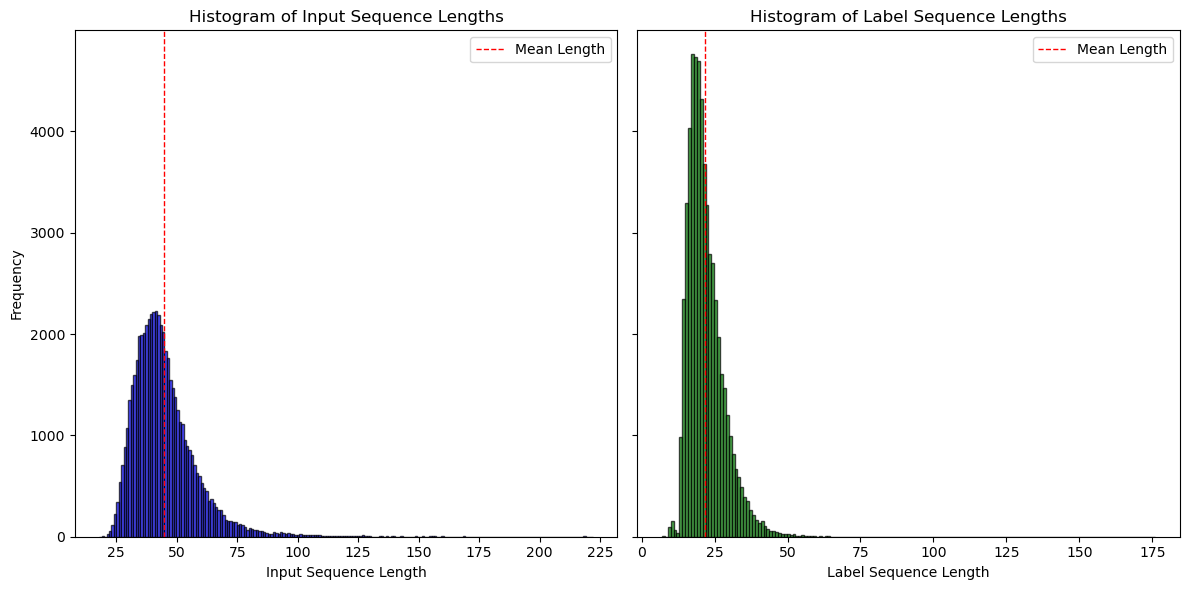

In [6]:
sequence_length_histograms(tokenized_train_data)

In [7]:
filtered_train_data = tokenized_train_data.filter(lambda sample: filter_function(sample, tokenizer), batched=False)

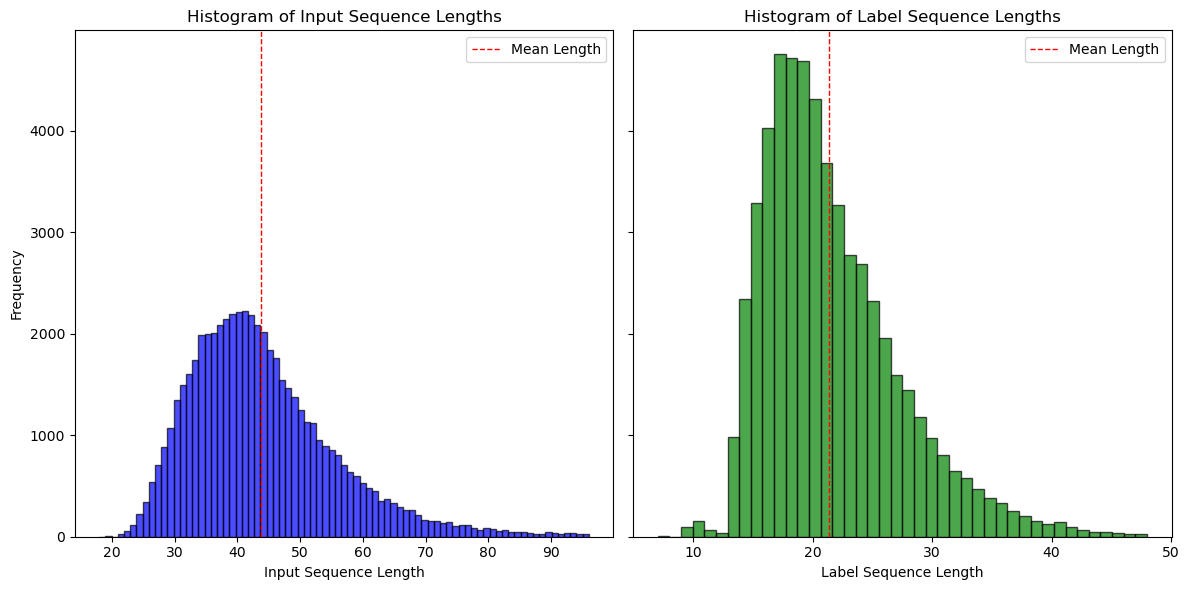

In [8]:
sequence_length_histograms(filtered_train_data)

In [9]:
# Flatten the dataset to count unique tokens
all_tokens = [token for seq in tokenized_train_data["input_ids"] for token in seq]
unique_tokens = set(all_tokens)
print(f"Number of unique tokens: {len(unique_tokens)}")

Number of unique tokens: 15259


Calculating token frequencies...
Plotting token frequency histogram...


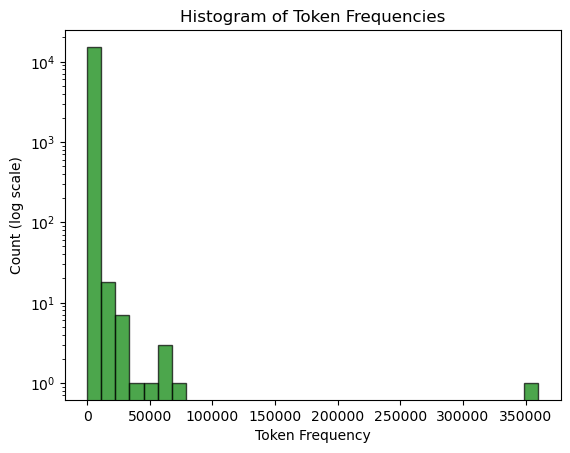

In [10]:
# Token frequency distribution
print("Calculating token frequencies...")
token_counts = Counter(all_tokens)

# Plot histogram of token counts
print("Plotting token frequency histogram...")
frequencies = list(token_counts.values())
plt.hist(frequencies, bins=32, alpha=0.7, color='green', edgecolor='black', log=True)
plt.xlabel('Token Frequency')
plt.ylabel('Count (log scale)')
plt.title('Histogram of Token Frequencies')
plt.show()

In [15]:
# Top 20 most common tokens
print("Top 10 most common tokens:")
top_10_tokens = token_counts.most_common(20)
print(f"{'Token':<15}{'Count':<10}")
print("-" * 25)
for token, count in top_10_tokens:
    print(f"{str(tokenizer.decode(token)):<15}{count:<10}")

Top 10 most common tokens:
Token          Count     
-------------------------
|              359938    
s              72051     
               62156     
the            61240     
</s>           56355     
?              50801     
a              35125     
of             32638     
is             31479     
What           28199     
e              28191     
o              24670     
S              24356     
d              23012     
D              21923     
t              18478     
)              18455     
team           17039     
ate            15938     
A              15746     
